<a href="https://colab.research.google.com/github/rajarishiR/programm/blob/main/smpl_linr_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print(data.shape)

(25, 2)


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


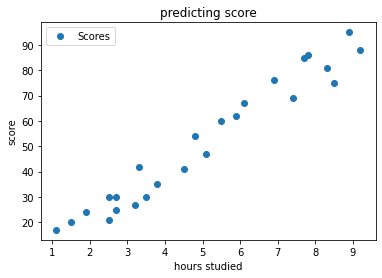

In [6]:
# explore the data by ploting
import matplotlib.pyplot as plt
data.plot(x='Hours', y='Scores',style='o')
plt.xlabel('hours studied')
plt.ylabel('score')
plt.title('predicting score')
plt.show()

In [7]:
# we also use pearson correleation to find linear regression
data.corr()
# it shows high linear releation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
# spliting the data
x = data.iloc[:, :-1].values # selecting the entire first column to take it as a feature
y = data.iloc[:,1].values # selecting second column as target values                

In [10]:
# to split the data randomly for train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
x_test

array([[3.5],
       [5.5],
       [5.9],
       [3.8],
       [3.2]])

In [12]:
x_train

array([[2.5],
       [8.3],
       [2.5],
       [1.5],
       [7.8],
       [3.3],
       [4.5],
       [9.2],
       [6.9],
       [1.9],
       [2.7],
       [4.8],
       [7.4],
       [8.9],
       [6.1],
       [7.7],
       [1.1],
       [8.5],
       [2.7],
       [5.1]])

In [13]:
# modelling
# linear regression
from sklearn.linear_model import LinearRegression # importes models for linear regression algorithim
regressor = LinearRegression() # declaring a varible regressor for linear regression 
regressor.fit(x_train, y_train) # entire model is done , gradient descent    

LinearRegression()

In [14]:
print(regressor.intercept_) # c is intercept

4.305921280336705


In [15]:
print(regressor.coef_) # m is regressor

[9.54430923]


In [16]:
y_pred = regressor.predict(x_train)
y_pred

array([28.16669436, 83.52368789, 28.16669436, 18.62238513, 78.75153328,
       35.80214174, 47.25531282, 92.1135662 , 70.16165497, 22.44010882,
       30.0755562 , 50.11860558, 74.93380958, 89.25027343, 62.52620758,
       77.79710235, 14.80466143, 85.43254974, 30.0755562 , 52.98189835])

In [19]:
#creating a dataframe for the test dataset and predicted
df = pd.DataFrame({'target_val':y_train, 'predicted_val':y_pred})
df.head()

,target_val,predicted_val
0,21,28.166694
1,81,83.523688
2,30,28.166694
3,20,18.622385
4,86,78.751533


In [21]:
# to calculate how good is my model we going evaluation matrices (but generally its used to compare btwn two model val)
from sklearn import metrics
print(metrics.r2_score(y_train,y_pred))

0.9579987786876565
